## Convolutional Neural Network dan foydalanilgan holda model o'qitish

#### CIFAR-10 datasetini train va test datalarga ajratilgan holatda yuklab olamiz

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

#### Train datasetidagi bir nechta rasmlarni visual ko'rinishda chiqaramiz

C:\Users\Airi\AppData\Local\Temp\ipykernel_15784\794018892.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


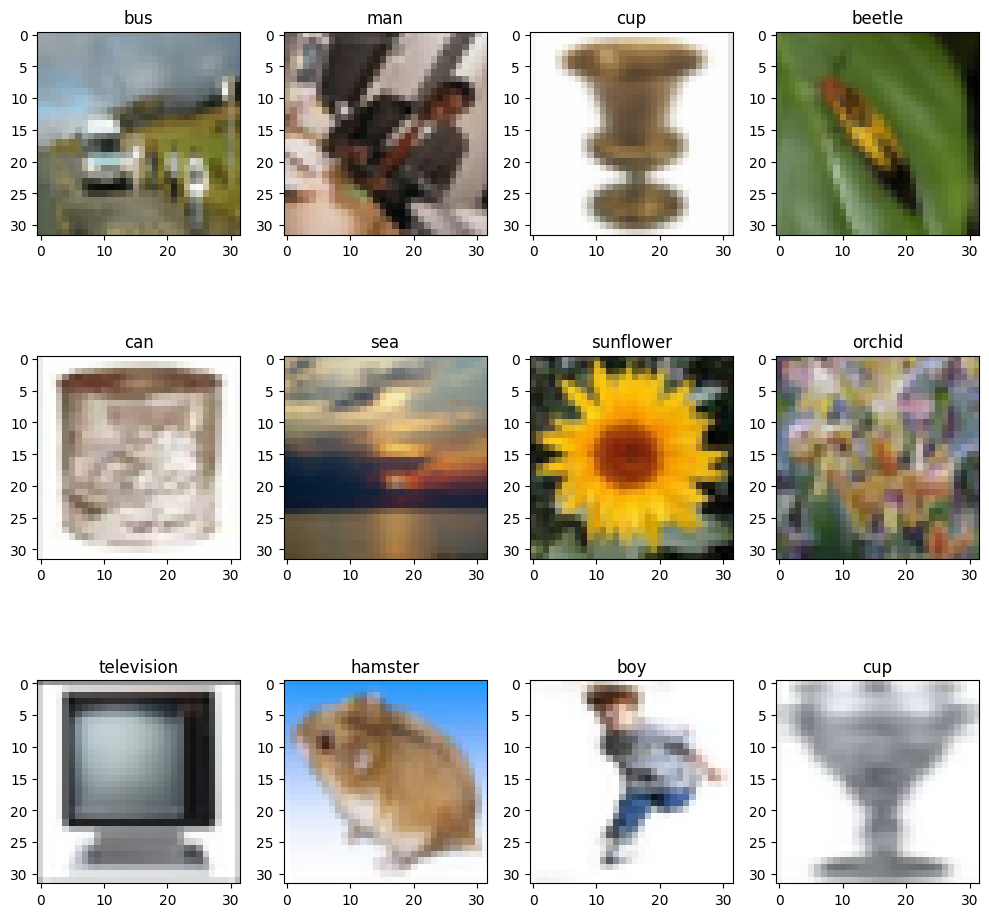

In [2]:
import matplotlib.pyplot as plt
import numpy as np

classlar = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
                    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
                    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
                    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
                    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
                    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
                    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
                    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
                    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
                    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(classlar[int(labels[k][0])])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
  
show_samples(x_train, y_train)

#### Train va Test data larning shape larini  tekshiramiz

In [3]:
print(f"x train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print(f"x test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")

x train shape:(50000, 32, 32, 3)
y train shape:(50000, 1)
x test shape:(10000, 32, 32, 3)
y test shape:(10000, 1)


#### One hot encoder funksiyasini yozib olamiz

In [4]:
import numpy as np

def one_hot_encoder(class_number,label_size):
    label = np.zeros(label_size)
    label[class_number] = 1
    return label

#### Train va Test uchun input data larni normallashtirib olamiz

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#### Train va Test uchun input data larni shape larini CNN uchun moslab olamiz 

In [6]:
x_train.reshape(x_train.shape[0],32,32,3)
x_test.reshape(x_test.shape[0],32,32,3)

array([[[[0.78039217, 0.84313726, 0.9764706 ],
         [0.76862746, 0.827451  , 0.95686275],
         [0.7647059 , 0.8235294 , 0.9529412 ],
         ...,
         [0.84705883, 0.90588236, 0.98039216],
         [0.8509804 , 0.90588236, 0.98039216],
         [0.8784314 , 0.91764706, 0.9882353 ]],

        [[0.77254903, 0.8235294 , 0.9372549 ],
         [0.7647059 , 0.8156863 , 0.93333334],
         [0.7647059 , 0.8235294 , 0.9411765 ],
         ...,
         [0.90588236, 0.9529412 , 0.98039216],
         [0.9137255 , 0.9529412 , 0.98039216],
         [0.94509804, 0.9607843 , 0.99215686]],

        [[0.87058824, 0.8862745 , 0.9647059 ],
         [0.8352941 , 0.8627451 , 0.9490196 ],
         [0.81960785, 0.85882354, 0.9529412 ],
         ...,
         [0.9529412 , 0.98039216, 0.9843137 ],
         [0.95686275, 0.9764706 , 0.9843137 ],
         [0.98039216, 0.98039216, 0.99215686]],

        ...,

        [[0.28235295, 0.28627452, 0.3882353 ],
         [0.2784314 , 0.2901961 , 0.4       ]

#### Train va Test uchun chiquvchi data larni label holatidan one hot encode holatiga o'tkazib olamiz

In [7]:
y_train = np.array([one_hot_encoder(class_number,100) for class_number in y_train])
y_test = np.array([one_hot_encoder(class_number,100) for class_number in y_test])

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Model o'qitish uchun kerakli modullarni chaqirib olamiz

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

#### Model arxitekturasini ishlab chiqamiz

In [10]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation='relu',input_shape=x_train.shape[1:])) # 30x30x16
model.add(Conv2D(32, (3, 3), activation='relu')) # 28x28x32
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 14x14x64

model.add(Conv2D(128, (3, 3),activation='relu')) # 12x12x128
model.add(Conv2D(256, (3, 3), activation='relu')) # 10x10x256
model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) # 10x10x512
model.add(MaxPooling2D(pool_size=(2, 2))) # 5x5x512
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

#### Model qurishda foydalaniladigan weight va bias parametrlarini umumiy soni va har bir qatlamdagi sonini tekshirib olamiz

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 256)       295168    
                                                        

#### Parametrlarni sozlash va Loss aniqlash uchun kerakli metodlarni parametr sifatida ko'rsatib qo'yamiz

In [12]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

#### Modelni train qilish

In [13]:
train_test_history = model.fit(x_train, y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


c:\users\airi\appdata\local\programs\python\python38\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 296s 754ms/step - loss: 4.1397 - categorical_accuracy: 0.0607 - val_loss: 3.8358 - val_categorical_accuracy: 0.1070
Epoch 2/10
391/391 [==============================] - 300s 766ms/step - loss: 3.4285 - categorical_accuracy: 0.1768 - val_loss: 3.1515 - val_categorical_accuracy: 0.2314
Epoch 3/10
391/391 [==============================] - 298s 762ms/step - loss: 2.9425 - categorical_accuracy: 0.2686 - val_loss: 2.8309 - val_categorical_accuracy: 0.2954
Epoch 4/10
391/391 [==============================] - 302s 772ms/step - loss: 2.6092 - categorical_accuracy: 0.3355 - val_loss: 2.6524 - val_categorical_accuracy: 0.3342
Epoch 5/10
391/391 [==============================] - 21070s 54s/step - loss: 2.3161 - categorical_accuracy: 0.3952 - val_loss: 2.5225 - val_categorical_accuracy: 0.3580
Epoch 6/10
391/391 [==============================] - 299s 765ms/step - loss: 2.0503 - categorical_accuracy: 0.4547 - val_loss: 2.5410 - val_categorical_accuracy

#### Test uchun datalarni sinovdan o'tkazish

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 13s 41ms/step - loss: 3.0120 - categorical_accuracy: 0.3797


[3.012009859085083, 0.3797000050544739]

#### Train va Test uchun loss hamda accuracy larni grafigini chiqaramiz 

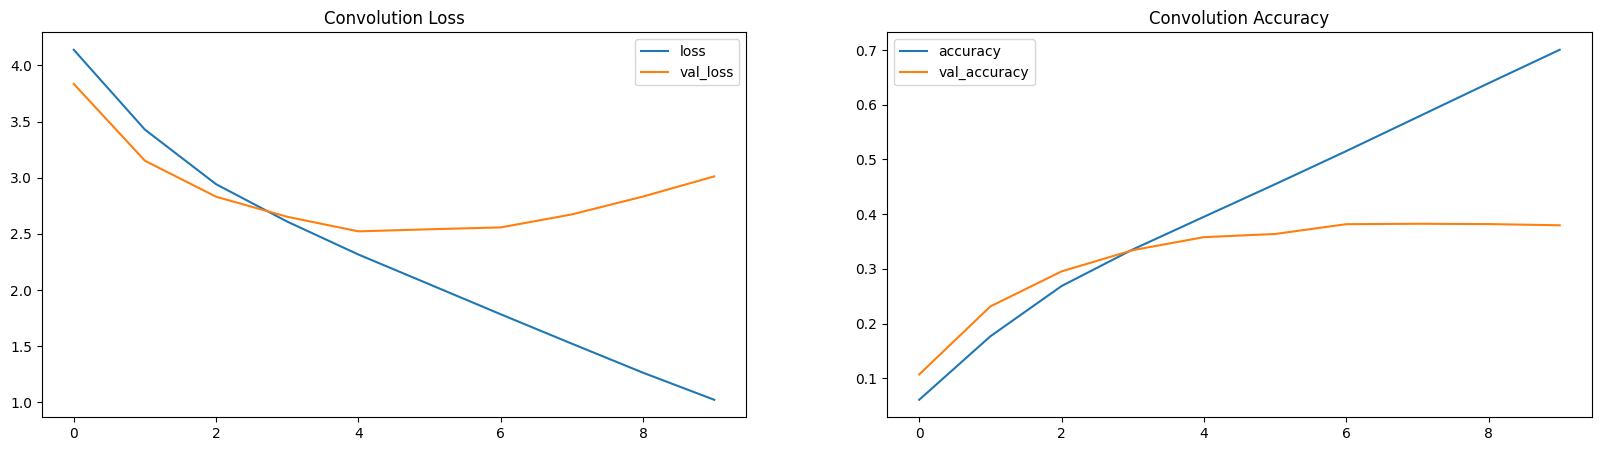

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Convolution Loss")
plt.plot(train_test_history.history["loss"], label="loss")
plt.plot(train_test_history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Convolution Accuracy")
plt.plot(train_test_history.history["categorical_accuracy"], label="accuracy")
plt.plot(train_test_history.history["val_categorical_accuracy"], label="val_accuracy")
plt.legend()

plt.show()

#### Modelni saqlash

In [16]:
model.save('model.h5')

####  Rasmni yuklab olish uchun kerakli modullarni chaqiramiz

In [18]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

#### Test qilish uchun rasmlarni yuklab olamiz 

In [19]:
images = np.array([np.array(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)) for file in glob.glob('rasmlar/*.jpg')])

#### Rasmlarni gray holatda chiqaramiz 

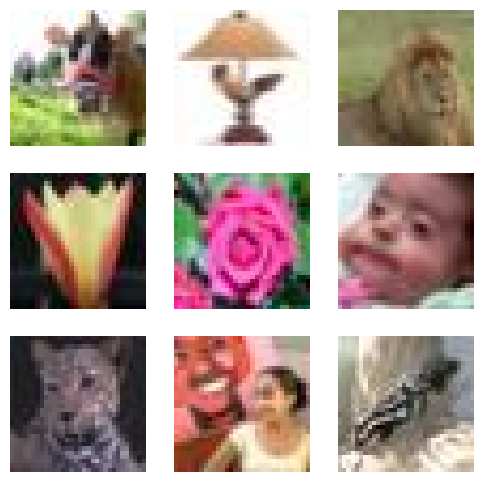

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(6,6))

for i, ax in enumerate(axs.flatten()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis('off')
plt.show()

#### Rasmlar matritsalari qiymatlarini float32 formatga keltiramiz, normallashtiramiz va shape ni modelga berish uchun moslashtiramiz

In [21]:
images = images.astype('float32')/255
images = images.reshape(9,32,32,3)

#### Rasmlarni qiymatlarini bashorat qilish uchun Modelni yuklab olamiz

In [22]:
import tensorflow as tf
model = tf.keras.models.load_model("model.h5")

In [23]:
one_hot_encoding_label = model.predict(images)
one_hot_encoding_label.round(6)

1/1 [==============================] - 0s 106ms/step


array([[4.90000e-05, 2.00000e-06, 2.00000e-05, 1.70000e-05, 1.50000e-05,
        1.90000e-05, 6.10000e-04, 3.29900e-03, 1.87400e-03, 4.50000e-05,
        9.00000e-06, 8.00000e-06, 1.36000e-04, 9.90000e-05, 1.00000e-04,
        1.10000e-05, 1.01000e-04, 1.30000e-05, 1.02300e-03, 9.27701e-01,
        0.00000e+00, 0.00000e+00, 8.90000e-05, 2.00000e-06, 1.00000e-06,
        5.19000e-04, 4.00000e-06, 2.00000e-06, 1.00000e-06, 2.29000e-04,
        0.00000e+00, 1.00000e-06, 9.00000e-06, 8.70000e-05, 1.40000e-05,
        1.00000e-06, 0.00000e+00, 1.23750e-02, 1.00000e-05, 1.57300e-03,
        2.39000e-04, 9.93000e-04, 1.00000e-06, 0.00000e+00, 6.00000e-06,
        1.81000e-04, 0.00000e+00, 1.20000e-05, 2.44800e-03, 1.00000e-06,
        2.00000e-06, 1.19800e-03, 1.00000e-06, 2.80000e-05, 2.61000e-04,
        0.00000e+00, 2.00000e-06, 4.28000e-04, 0.00000e+00, 5.00000e-06,
        6.00000e-06, 1.00000e-06, 2.46800e-03, 0.00000e+00, 0.00000e+00,
        1.00000e-06, 0.00000e+00, 0.00000e+00, 0.00

#### Natija sifatida olingan one hot encoding labellaridan natijani olamiz 

C:\Users\Airi\AppData\Local\Temp\ipykernel_15784\2380753826.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


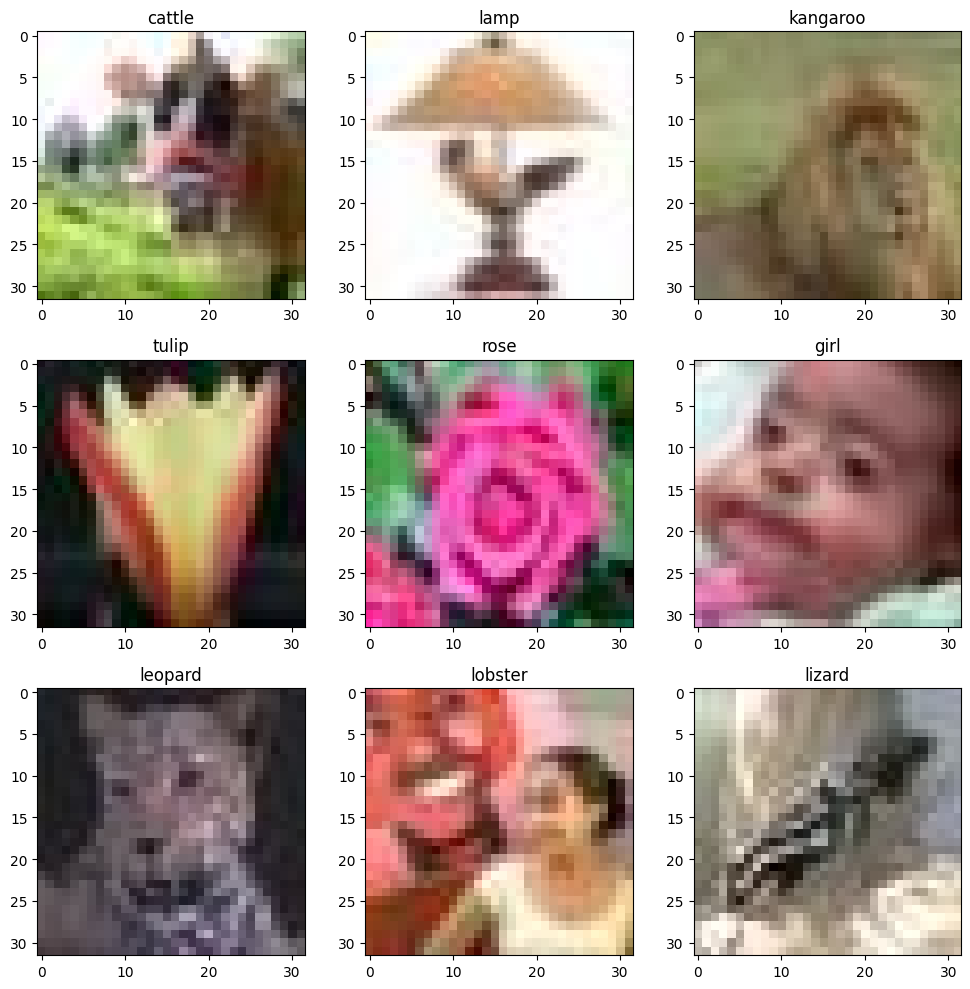

In [31]:
target = []

for i in range(len(images)):
    target.append(np.argmax(one_hot_encoding_label[i]))

plt.subplots(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(classlar[int(target[i])])
    plt.imshow(images[i])
plt.tight_layout()
plt.show()